In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Define input training data and parameter

In [2]:
input_signal_num = 100000 # number of training data
std_data = 10
input_data = std_data*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
std_N1 = 0#3
std_N2 = 0#1
k = 0.5
num_neuron = 512

Setting is the same as table 1 of paper (Learning Approaches to the Witsenhausen Counterexample From a
View of Potential Games)

# Define encoder and decoder (seperate scope, like: GAN)

In [3]:
# input x
x = tf.placeholder(tf.float32, [None, 1])
tmp_c = tf.placeholder(tf.float32, [None, 1])
noise = tf.placeholder(tf.float32, [None, 1])
noise2 = tf.placeholder(tf.float32, [None, 1])
# first neural network (encoder)
with tf.variable_scope("encoder") as scope1:
    l11 = tf.layers.dense(inputs = x, units = num_neuron, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1),name = 'e1')
        
    l12 = tf.layers.dense(inputs = l11, units = num_neuron/2, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1),name = 'e2')

    l13 = tf.layers.dense(inputs = l12, units = num_neuron/4, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1),name = 'e3')

    l14 = tf.layers.dense(inputs = l13, units = num_neuron/8, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1), name = 'e4')

    # output of first neural network
    u1 = tf.layers.dense(inputs = l14, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1), name = 'u1')


# add u1 with gaussian noise
y = tf.add(tf.multiply(u1, tmp_c), noise)


# second neural network (relay)
with tf.variable_scope("relay") as scope2:
    l21 = tf.layers.dense(inputs = y, units = num_neuron, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1), name = 'r1')
        
    l22 = tf.layers.dense(inputs = l21, units = num_neuron/2, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1), name = 'r2')

    l23 = tf.layers.dense(inputs = l22, units = num_neuron/4, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1), name = 'r3')

    l24 = tf.layers.dense(inputs = l23, units = num_neuron/8, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1), name = 'r4')

    # output of second neural network
    u2 = tf.layers.dense(inputs = l24, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1), name = 'u2')
    
# add u1 with gaussian noise
y2 = tf.add(tf.multiply(u2, tmp_c), noise2)

# second neural network (decoder)
with tf.variable_scope("decoder") as scope3:
    l31 = tf.layers.dense(inputs = y2, units = num_neuron, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1), name = 'd1')
        
    l32 = tf.layers.dense(inputs = l31, units = num_neuron/2, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1), name = 'd2')

    l33 = tf.layers.dense(inputs = l32, units = num_neuron/4, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1), name = 'd3')

    l34 = tf.layers.dense(inputs = l33, units = num_neuron/8, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1), name = 'd4')

    # output of second neural network
    u3 = tf.layers.dense(inputs = l34, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1), name = 'u3')

In [4]:
encoder_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'encoder')
encoder_var

[<tf.Variable 'encoder/e1/kernel:0' shape=(1, 512) dtype=float32_ref>,
 <tf.Variable 'encoder/e1/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'encoder/e2/kernel:0' shape=(512, 256) dtype=float32_ref>,
 <tf.Variable 'encoder/e2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'encoder/e3/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'encoder/e3/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'encoder/e4/kernel:0' shape=(128, 64) dtype=float32_ref>,
 <tf.Variable 'encoder/e4/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'encoder/u1/kernel:0' shape=(64, 1) dtype=float32_ref>,
 <tf.Variable 'encoder/u1/bias:0' shape=(1,) dtype=float32_ref>]

In [5]:
relay_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'relay')
relay_var

[<tf.Variable 'relay/r1/kernel:0' shape=(1, 512) dtype=float32_ref>,
 <tf.Variable 'relay/r1/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'relay/r2/kernel:0' shape=(512, 256) dtype=float32_ref>,
 <tf.Variable 'relay/r2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'relay/r3/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'relay/r3/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'relay/r4/kernel:0' shape=(128, 64) dtype=float32_ref>,
 <tf.Variable 'relay/r4/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'relay/u2/kernel:0' shape=(64, 1) dtype=float32_ref>,
 <tf.Variable 'relay/u2/bias:0' shape=(1,) dtype=float32_ref>]

In [6]:
decoder_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'decoder')
decoder_var

[<tf.Variable 'decoder/d1/kernel:0' shape=(1, 512) dtype=float32_ref>,
 <tf.Variable 'decoder/d1/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'decoder/d2/kernel:0' shape=(512, 256) dtype=float32_ref>,
 <tf.Variable 'decoder/d2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'decoder/d3/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'decoder/d3/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'decoder/d4/kernel:0' shape=(128, 64) dtype=float32_ref>,
 <tf.Variable 'decoder/d4/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'decoder/u3/kernel:0' shape=(64, 1) dtype=float32_ref>,
 <tf.Variable 'decoder/u3/bias:0' shape=(1,) dtype=float32_ref>]

# Define loss function

In [7]:
loss = k * tf.reduce_mean(tf.square(u1)) + k * tf.reduce_mean(tf.square(u2)) + tf.reduce_mean(tf.square(u3-x))
optimizer = tf.train.AdamOptimizer(0.001)
train_opt1 = optimizer.minimize(loss, var_list=encoder_var)
train_opt2 = optimizer.minimize(loss, var_list=relay_var)
train_opt3 = optimizer.minimize(loss, var_list=decoder_var)

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [9]:
x_axis = np.array([np.linspace(-20, 20, num=input_signal_num).tolist()]).T

# Before optimization with loss function

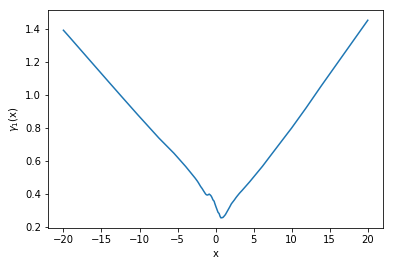

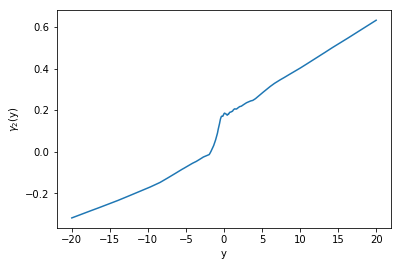

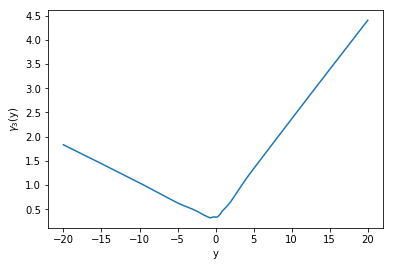

current loss (every 30 iteration): 100.821


In [10]:
y_axis = sess.run(u1, feed_dict = {x:x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('$\gamma_1$(x)')
plt.show()
y_axis = sess.run(u2, feed_dict = {x:x_axis,tmp_c : np.array([[0]]), noise: x_axis, noise2: x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('y')
plt.ylabel('$\gamma_2$(y)')
plt.show()
y_axis = sess.run(u3, feed_dict = {x:x_axis,tmp_c : np.array([[0]]), noise: x_axis, noise2: x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('y')
plt.ylabel('$\gamma_3$(y)')
plt.show()

feed_dict2 = {x:input_data ,tmp_c : np.array([[1]]), noise: std_N1*np.random.randn(input_signal_num, 1), noise2: std_N2*np.random.randn(input_signal_num, 1)}
print('current loss (every 30 iteration):',sess.run(loss,feed_dict2))

# Optimization

optimize encoder
current loss (every 30 iteration): 100.425


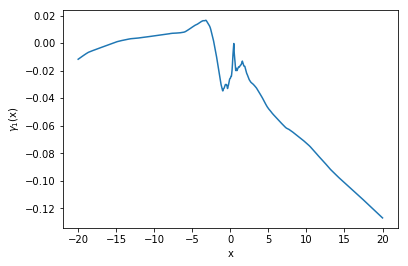

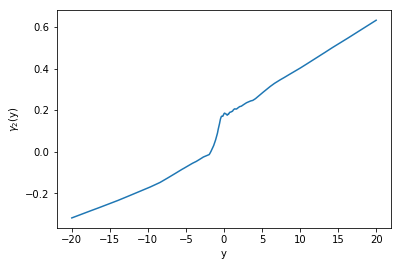

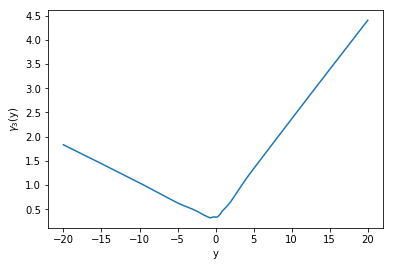

optimize relay
current loss (every 30 iteration): 100.078


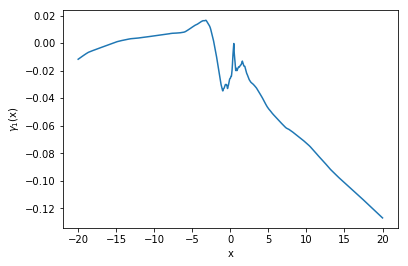

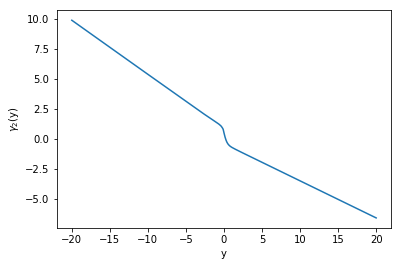

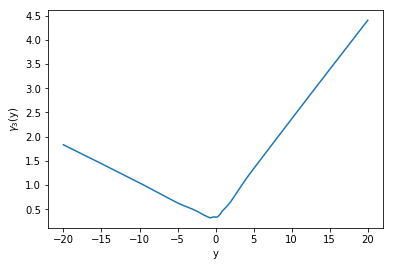

optimize decoder
current loss (every 30 iteration): 27.7812


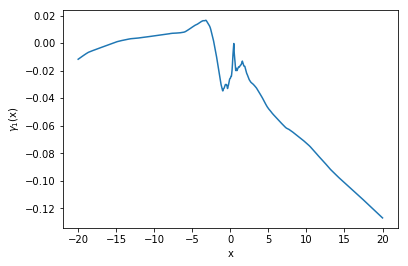

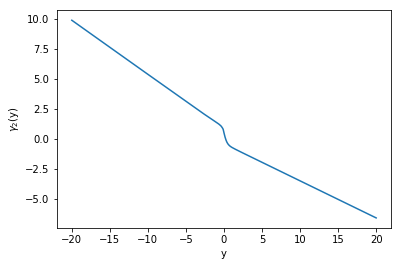

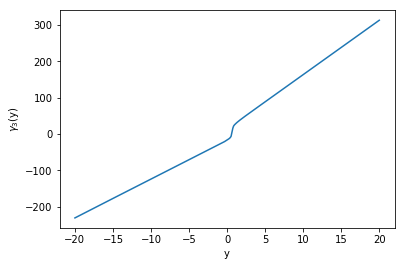

optimize encoder
current loss (every 30 iteration): 177.167


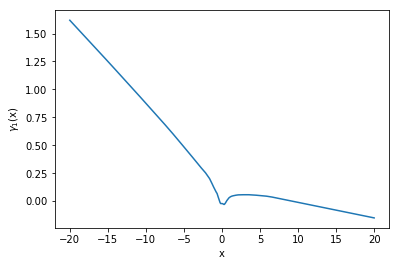

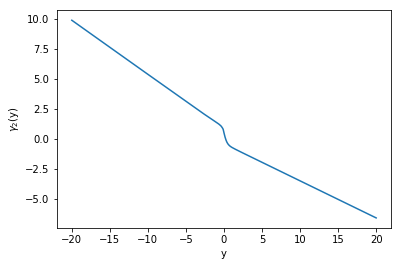

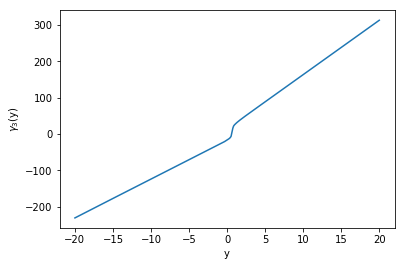

optimize relay
current loss (every 30 iteration): 7.7408


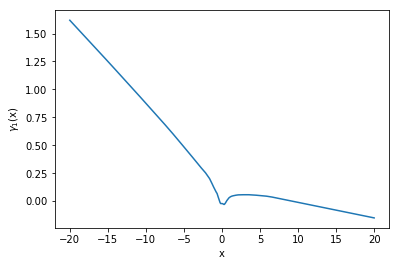

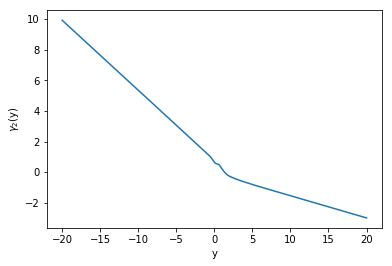

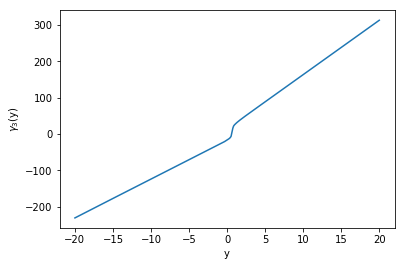

optimize decoder
current loss (every 30 iteration): 5.69421


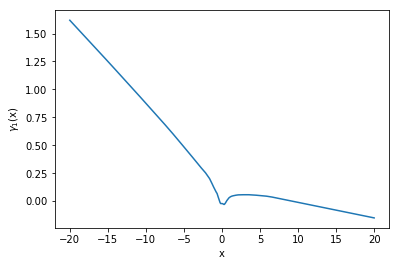

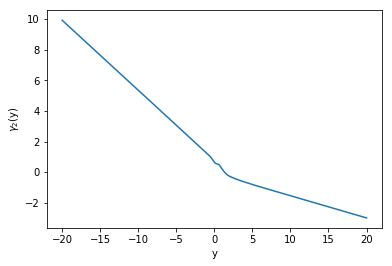

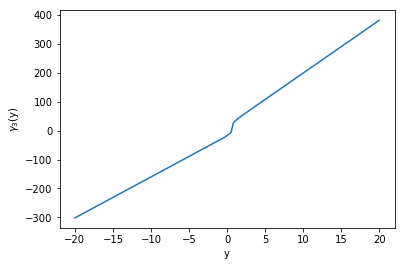

optimize encoder
current loss (every 30 iteration): 3.19045


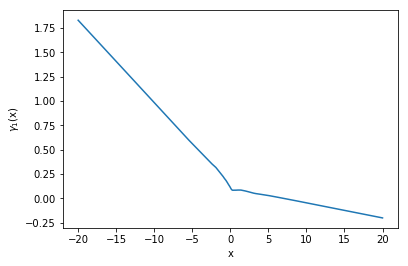

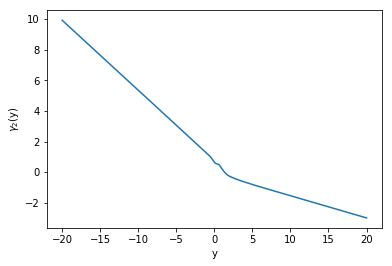

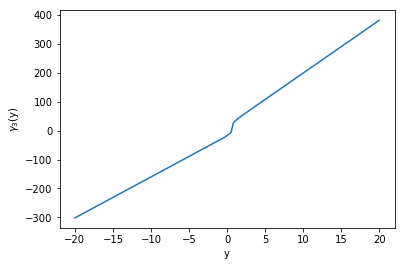

optimize relay
current loss (every 30 iteration): 0.682994


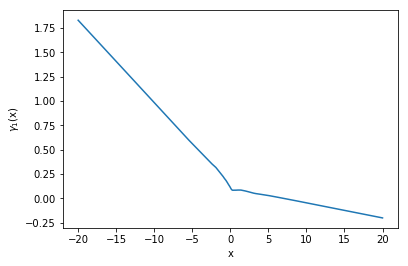

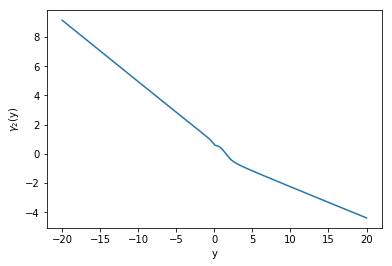

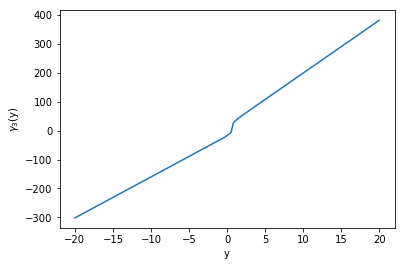

optimize decoder
current loss (every 30 iteration): 0.508741


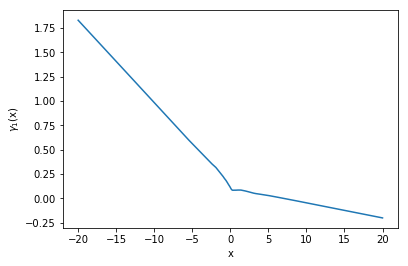

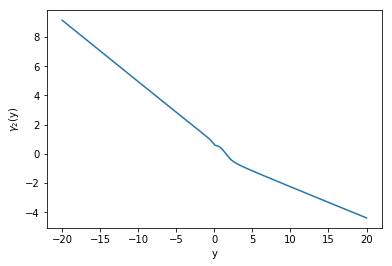

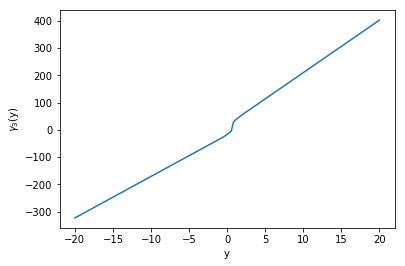

optimize encoder
current loss (every 30 iteration): 0.495613


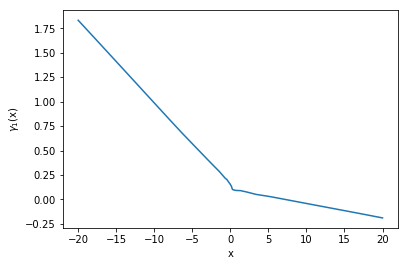

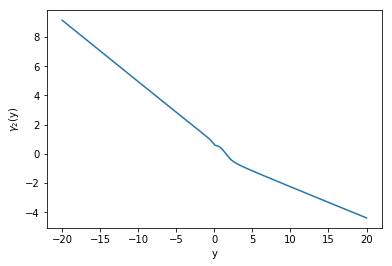

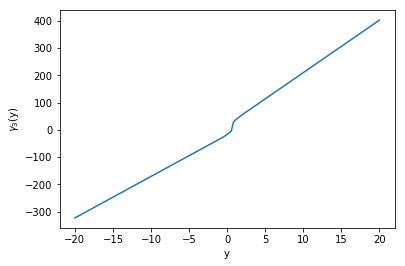

optimize relay
current loss (every 30 iteration): 0.458218


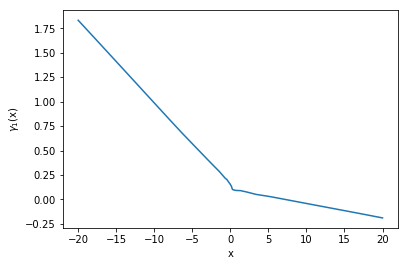

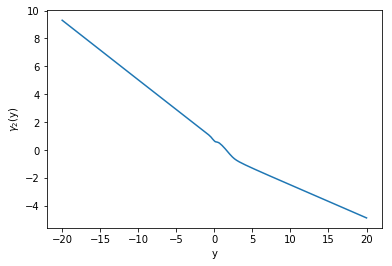

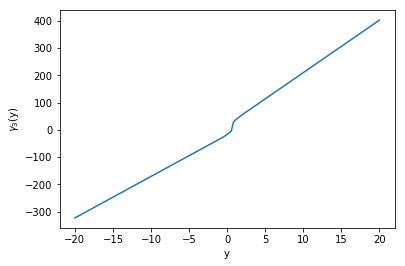

optimize decoder


KeyboardInterrupt: 

In [11]:
for index in range(50): # total 40
    # optimize encoder
    print('optimize encoder')
    for i in range(30):
        input_data = std_data*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
        feed_dict2 = {x:input_data, tmp_c : np.array([[1]]), noise: std_N1*np.random.randn(input_signal_num, 1), noise2: std_N2*np.random.randn(input_signal_num, 1)}
        sess.run(train_opt1, feed_dict2)
        if i % 30 == 29:
            print('current loss (every 30 iteration):',sess.run(loss,feed_dict2))
            y_axis = sess.run(u1, feed_dict = {x:x_axis})
            plt.plot(x_axis[:,0],y_axis[:,0])
            plt.xlabel('x')
            plt.ylabel('$\gamma_1$(x)')
            plt.show()
            y_axis = sess.run(u2, feed_dict = {x:x_axis,tmp_c : np.array([[0]]), noise: x_axis, noise2: x_axis})
            plt.plot(x_axis[:,0],y_axis[:,0])
            plt.xlabel('y')
            plt.ylabel('$\gamma_2$(y)')
            plt.show()
            y_axis = sess.run(u3, feed_dict = {x:x_axis,tmp_c : np.array([[0]]), noise: x_axis, noise2: x_axis})
            plt.plot(x_axis[:,0],y_axis[:,0])
            plt.xlabel('y')
            plt.ylabel('$\gamma_3$(y)')
            plt.show()
        
    # optimize relay
    print('optimize relay')
    for i in range(30):
        input_data = std_data*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
        feed_dict2 = {x:input_data ,tmp_c : np.array([[1]]), noise: std_N1*np.random.randn(input_signal_num, 1), noise2: std_N2*np.random.randn(input_signal_num, 1)}
        sess.run(train_opt2, feed_dict2)
        if i % 30 == 29:
            print('current loss (every 30 iteration):',sess.run(loss,feed_dict2))
            y_axis = sess.run(u1, feed_dict = {x:x_axis})
            plt.plot(x_axis[:,0],y_axis[:,0])
            plt.xlabel('x')
            plt.ylabel('$\gamma_1$(x)')
            plt.show()
            y_axis = sess.run(u2, feed_dict = {x:x_axis,tmp_c : np.array([[0]]), noise: x_axis, noise2: x_axis})
            plt.plot(x_axis[:,0],y_axis[:,0])
            plt.xlabel('y')
            plt.ylabel('$\gamma_2$(y)')
            plt.show()
            y_axis = sess.run(u3, feed_dict = {x:x_axis,tmp_c : np.array([[0]]), noise: x_axis, noise2: x_axis})
            plt.plot(x_axis[:,0],y_axis[:,0])
            plt.xlabel('y')
            plt.ylabel('$\gamma_3$(y)')
            plt.show()
            
        # optimize decoder
    print('optimize decoder')
    for i in range(30):
        input_data = std_data*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
        feed_dict2 = {x:input_data ,tmp_c : np.array([[1]]), noise: std_N1*np.random.randn(input_signal_num, 1), noise2: std_N2*np.random.randn(input_signal_num, 1)}
        sess.run(train_opt3, feed_dict2)
        if i % 30 == 29:
            print('current loss (every 30 iteration):',sess.run(loss,feed_dict2))
            y_axis = sess.run(u1, feed_dict = {x:x_axis})
            plt.plot(x_axis[:,0],y_axis[:,0])
            plt.xlabel('x')
            plt.ylabel('$\gamma_1$(x)')
            plt.show()
            y_axis = sess.run(u2, feed_dict = {x:x_axis,tmp_c : np.array([[0]]), noise: x_axis, noise2: x_axis})
            plt.plot(x_axis[:,0],y_axis[:,0])
            plt.xlabel('y')
            plt.ylabel('$\gamma_2$(y)')
            plt.show()
            y_axis = sess.run(u3, feed_dict = {x:x_axis,tmp_c : np.array([[0]]), noise: x_axis, noise2: x_axis})
            plt.plot(x_axis[:,0],y_axis[:,0])
            plt.xlabel('y')
            plt.ylabel('$\gamma_3$(y)')
            plt.show()

# After optimization with loss

In [ ]:
y_axis = sess.run(u1, feed_dict = {x:x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('$\gamma_1$(x)')
plt.show()
y_axis = sess.run(u2, feed_dict = {x:x_axis,tmp_c : np.array([[0]]), noise: x_axis, noise2: x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('y')
plt.ylabel('$\gamma_2$(y)')
plt.show()
y_axis = sess.run(u3, feed_dict = {x:x_axis,tmp_c : np.array([[0]]), noise: x_axis, noise2: x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('y')
plt.ylabel('$\gamma_3$(y)')
plt.show()